In [2]:
import MySQLdb
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = MySQLdb.connect(
    host='127.0.0.1',
    user='jozsef',
    passwd='bozso',
    db='kviz',
    charset='utf8mb4',
)

In [4]:
mohacs_sql = '''
SELECT
    k.id AS kerdes_id,
    k.szoveg AS kerdes_szoveg,
    COUNT(n.id) AS probalkozas_db,
    SUM(n.helyes = 1) AS helyes_db
FROM naplo n
JOIN kerdes k ON k.id = n.kerdes_id
WHERE k.szoveg = "Mikor volt a Mohácsi vész?"
GROUP BY k.id, k.szoveg
'''

df_mohacs = pd.read_sql(mohacs_sql, conn)
df_mohacs

C:\Users\Józsi\AppData\Local\Temp\ipykernel_19020\50036519.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mohacs = pd.read_sql(mohacs_sql, conn)


,kerdes_id,kerdes_szoveg,probalkozas_db,helyes_db
0,3,Mikor volt a Mohácsi vész?,12,6.0


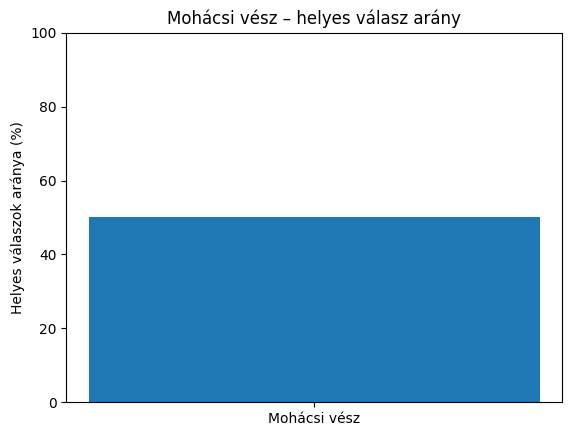

In [5]:
df_mohacs['helyes_szazalek'] = (df_mohacs['helyes_db'] / df_mohacs['probalkozas_db']) * 100

plt.figure()
plt.bar(['Mohácsi vész'], df_mohacs['helyes_szazalek'])
plt.ylim(0, 100)
plt.ylabel('Helyes válaszok aránya (%)')
plt.title('Mohácsi vész – helyes válasz arány')
plt.show()

In [6]:
emlos_sql = '''
SELECT
    v.szoveg AS valasz,
    SUM(n.valasztott_valasz_id = v.id) AS db,
    MAX(v.helyes) AS helyes
FROM naplo n
JOIN kerdes k ON k.id = n.kerdes_id
JOIN valaszlehetoseg v ON v.kerdes_id = k.id
WHERE k.szoveg = "Mi a legnagyobb emlős a Földön?"
GROUP BY v.id, v.szoveg
ORDER BY db DESC
'''

df_emlos = pd.read_sql(emlos_sql, conn)
df_emlos

C:\Users\Józsi\AppData\Local\Temp\ipykernel_19020\3312123441.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_emlos = pd.read_sql(emlos_sql, conn)


,valasz,db,helyes
0,kék bálna,8.0,1
1,afrikai elefánt,3.0,0
2,kodiak-medve,1.0,0
3,jegesmedve,0.0,0


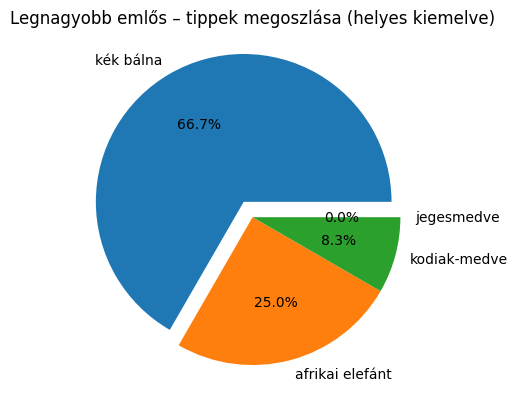

In [7]:
labels = df_emlos['valasz'].tolist()
sizes = df_emlos['db'].tolist()

explode = [0.12 if int(h) == 1 else 0 for h in df_emlos['helyes'].tolist()]

plt.figure()
plt.pie(
    sizes,
    labels=labels,
    explode=explode,
    autopct='%1.1f%%',
)
plt.title('Legnagyobb emlős – tippek megoszlása (helyes kiemelve)')
plt.show()

In [8]:
conn.close()